# Digital Image Processing Notebook

The original code was done in Matlab so mind the differences in Python, some of the results may differ

## Introduction

Grayscale

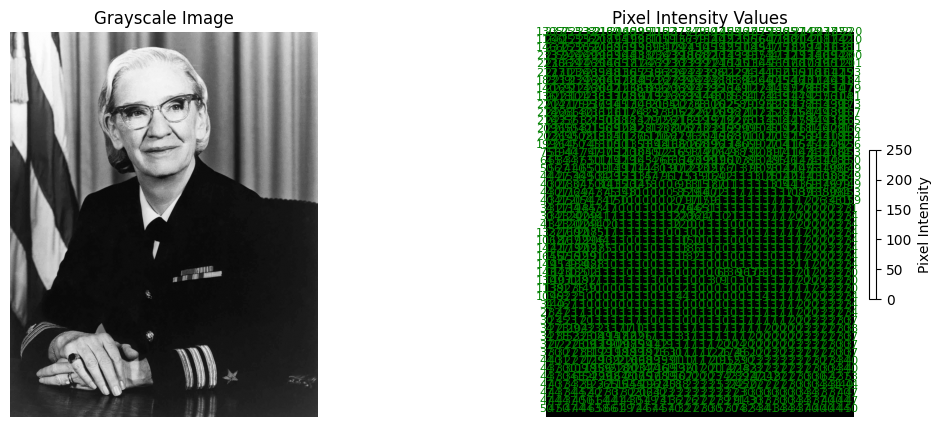

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the image
img = cv2.imread('grace_hopper.jpg', cv2.IMREAD_GRAYSCALE)  # Ensure the image file is in the working directory or provide the full path
if img is None:
    raise FileNotFoundError("Image not found. Please check the path.")

# Set up the figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Left subplot: Display the grayscale image in high quality
ax1.imshow(img, cmap='gray')
ax1.set_title('Grayscale Image', fontsize=12, color='black')
ax1.axis('off')

# Right subplot: Display pixel intensity values on a black background
black_bg = np.zeros_like(img)
ax2.imshow(black_bg, cmap='gray')
ax2.axis('off')

# Add colorbar for grayscale intensity reference
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='gray'), ax=ax2, fraction=0.02, pad=0.04)
cbar.set_label('Pixel Intensity', fontsize=10)
cbar.set_ticks(range(0, 256, 50))  # Fewer displayed values for readability

# Display pixel intensity values in green on the black background
step = 50  # Step size for displaying fewer values
font_size = 8

for i in range(0, img.shape[0], step):
    for j in range(0, img.shape[1], step):
        pixel_value = img[i, j]
        ax2.text(j, i, str(pixel_value), color='green', fontsize=font_size,
                ha='center', va='center')

# Title and layout adjustments
ax2.set_title('Pixel Intensity Values', color='black', fontsize=12)

plt.subplots_adjust(left=0.05, right=0.95, wspace=0.4)  # Adjust subplot spacing
plt.show()


RGB image

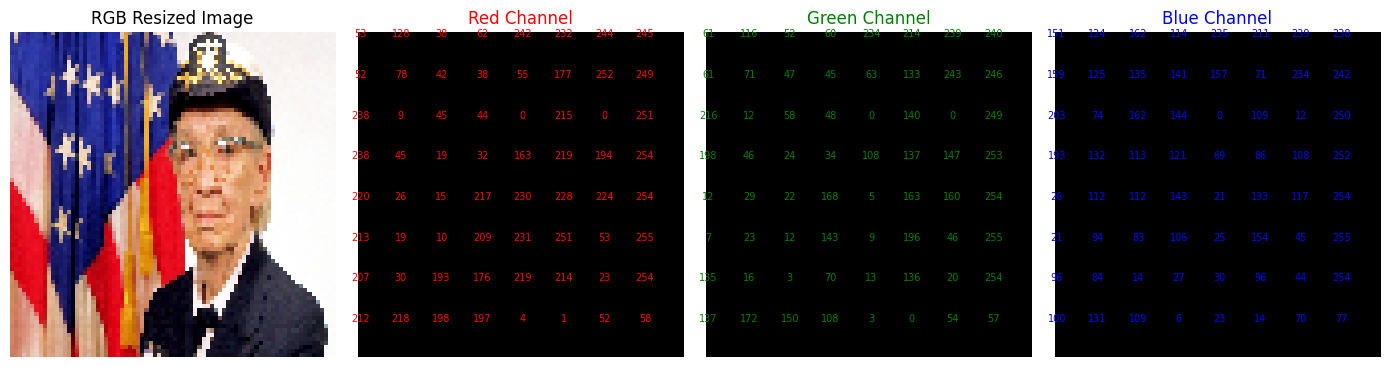

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the high-quality RGB image
img = cv2.imread('grace_hopper_RGB.jpg')  # Read the file (make sure the file is in the working directory)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR (OpenCV format) to RGB

# Resize image data for better readability in the channel subplots
resized_img = cv2.resize(img, (80, 80))  # Resize image to 80x80 for clarity

# Define step size for pixel display and font size for text
step = 10  # Adjust this to control sparsity of displayed pixels
font_size = 7

# Set up the figure with four subplots (RGB image + 3 color channels)
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# First subplot: Display the original RGB image
axes[0].imshow(resized_img)
axes[0].set_title('RGB Resized Image', fontsize=12)
axes[0].axis('off')

# Red Channel
axes[1].imshow(np.zeros_like(resized_img))  # Black background
axes[1].set_title('Red Channel', color='red', fontsize=12)
axes[1].axis('off')
for i in range(0, resized_img.shape[0], step):
    for j in range(0, resized_img.shape[1], step):
        red_val = resized_img[i, j, 0]  # Red channel value
        axes[1].text(j, i, f'{red_val}', color='red', fontsize=font_size,
                    ha='center', va='center')

# Green Channel
axes[2].imshow(np.zeros_like(resized_img))  # Black background
axes[2].set_title('Green Channel', color='green', fontsize=12)
axes[2].axis('off')
for i in range(0, resized_img.shape[0], step):
    for j in range(0, resized_img.shape[1], step):
        green_val = resized_img[i, j, 1]  # Green channel value
        axes[2].text(j, i, f'{green_val}', color='green', fontsize=font_size,
                    ha='center', va='center')

# Blue Channel
axes[3].imshow(np.zeros_like(resized_img))  # Black background
axes[3].set_title('Blue Channel', color='blue', fontsize=12)
axes[3].axis('off')
for i in range(0, resized_img.shape[0], step):
    for j in range(0, resized_img.shape[1], step):
        blue_val = resized_img[i, j, 2]  # Blue channel value
        axes[3].text(j, i, f'{blue_val}', color='blue', fontsize=font_size,
                    ha='center', va='center')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


RGB image 2

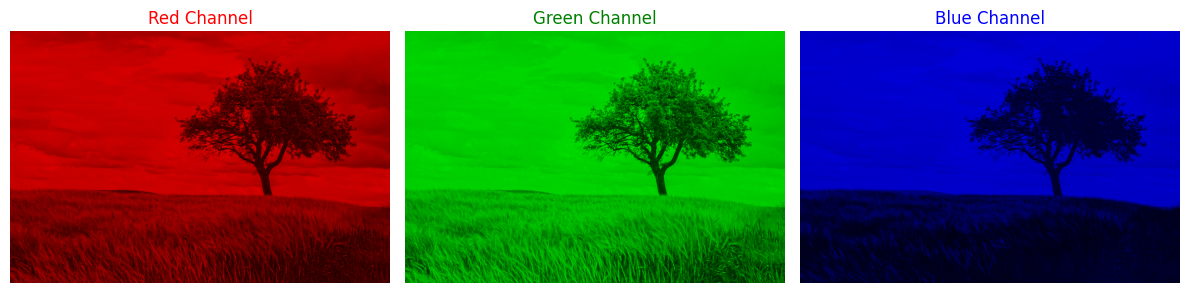

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the high-quality RGB image
img = cv2.imread('tree.jpeg')  # Ensure the image file is in the working directory
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert from BGR (OpenCV format) to RGB

# Convert the image to double precision (normalize to range 0-1)
img_double = img.astype(np.float32) / 255.0

# Separate each channel and create individual images for each color
red_channel_img = np.zeros_like(img_double)
red_channel_img[:, :, 0] = img_double[:, :, 0]  # Red channel

green_channel_img = np.zeros_like(img_double)
green_channel_img[:, :, 1] = img_double[:, :, 1]  # Green channel

blue_channel_img = np.zeros_like(img_double)
blue_channel_img[:, :, 2] = img_double[:, :, 2]  # Blue channel

# Set up the figure with three subplots (for each color channel)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Red Channel
axes[0].imshow(red_channel_img)
axes[0].set_title('Red Channel', color='red', fontsize=12)
axes[0].axis('off')

# Green Channel
axes[1].imshow(green_channel_img)
axes[1].set_title('Green Channel', color='green', fontsize=12)
axes[1].axis('off')

# Blue Channel
axes[2].imshow(blue_channel_img)
axes[2].set_title('Blue Channel', color='blue', fontsize=12)
axes[2].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Noise

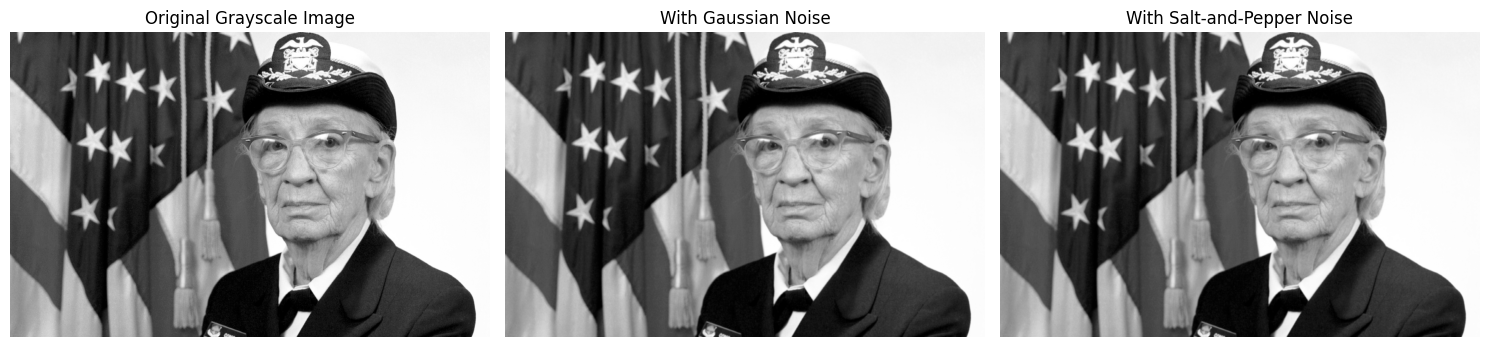

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the RGB image and convert to grayscale
img = cv2.imread('grace_hopper_RGB.jpg')  # Ensure the image file is in the working directory
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    gaussian = np.random.normal(0, sigma * 255, (row, col))  # Generate Gaussian noise
    noisy_image = image + gaussian
    noisy_image = np.clip(noisy_image, 0, 255)  # Ensure pixel values are in range [0, 255]
    return noisy_image.astype(np.uint8)

# Function to add salt-and-pepper noise
def add_salt_and_pepper_noise(image, density):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = np.ceil(density * total_pixels * 0.5)  # Number of salt pixels
    num_pepper = np.ceil(density * total_pixels * 0.5)  # Number of pepper pixels

    # Add salt (white) noise
    for _ in range(int(num_salt)):
        i = random.randint(0, image.shape[0] - 1)
        j = random.randint(0, image.shape[1] - 1)
        noisy_image[i, j] = 255  # White pixel

    # Add pepper (black) noise
    for _ in range(int(num_pepper)):
        i = random.randint(0, image.shape[0] - 1)
        j = random.randint(0, image.shape[1] - 1)
        noisy_image[i, j] = 0  # Black pixel

    return noisy_image

# Add Gaussian noise
sigma =  1 # Standard deviation for Gaussian noise
gaussian_noisy_img = cv2.GaussianBlur(gray_img, None, sigma)

# Add salt-and-pepper noise
density = 0.01  # Noise density for salt-and-pepper
sp_noisy_img = cv2.GaussianBlur(gray_img, None, sigma)

# Display the original and noisy images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original grayscale image
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Original Grayscale Image', fontsize=12)
axes[0].axis('off')

# Grayscale image with Gaussian noise
axes[1].imshow(gaussian_noisy_img, cmap='gray')
axes[1].set_title('With Gaussian Noise', fontsize=12)
axes[1].axis('off')

# Grayscale image with salt-and-pepper noise
axes[2].imshow(sp_noisy_img, cmap='gray')
axes[2].set_title('With Salt-and-Pepper Noise', fontsize=12)
axes[2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## Filtering in the Spatial Domain

### Smoothing

Mean Filter

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Grace Hopper image (RGB)
img = cv2.imread('grace_hopper_RGB.jpg')  # Ensure the image file is in the working directory
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Define a 3x3 mean filter kernel
mean_kernel =

# Smooth the original grayscale image using the mean filter
smoothed_original = cv2.filter2D()

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original grayscale image
axes[0, 0].imshow(gray_img, cmap='gray')
axes[0, 0].set_title('Original Grayscale Image', fontsize=14)
axes[0, 0].axis('off')

# Histogram of original grayscale image using Seaborn
sns.histplot(gray_img.ravel(), bins=256, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Histogram (Original)', fontsize=14)
axes[0, 1].set_xlim([0, 255])
axes[0, 1].set_xlabel('Pixel Intensity', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Smoothed original image (mean filter)
axes[1, 0].imshow(smoothed_original, cmap='gray')
axes[1, 0].set_title('Smoothed Image (Mean Filter)', fontsize=14)
axes[1, 0].axis('off')

# Histogram of smoothed original image using Seaborn
sns.histplot(smoothed_original.ravel(), bins=256, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Histogram (Smoothed)', fontsize=14)
axes[1, 1].set_xlim([0, 255])
axes[1, 1].set_xlabel('Pixel Intensity', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


Gaussian Filter

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
original_img = cv2.imread('grace_hopper.jpg', cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    gaussian = np.random.normal(0, sigma * 255, (row, col))  # Generate Gaussian noise
    noisy_image = image + gaussian
    noisy_image = np.clip(noisy_image, 0, 255)  # Ensure pixel values are in range [0, 255]
    return noisy_image.astype(np.uint8)

# Increase the noise strength to make the effect more noticeable
noisy_img = add_gaussian_noise()  # Add Gaussian noise to the image

# Define Gaussian filter parameters with updated values
gaussian_sigma =   # Increased sigma for stronger smoothing
kernel_size = (,)  # Larger kernel size for better noise removal

# Apply Gaussian filter to smooth the noisy image
smoothed_img = cv2.GaussianBlur(noisy_img, kernel_size, gaussian_sigma)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Noisy image
axes[0].imshow(np.clip(noisy_img, 0, 255).astype(np.uint8), cmap='gray')
axes[0].set_title('Noisy Image (Gaussian Noise)', fontsize=12)
axes[0].axis('off')

# Smoothed image
axes[1].imshow(smoothed_img, cmap='gray')
axes[1].set_title('Smoothed Image (Gaussian Filter)', fontsize=12)
axes[1].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### Sharpening

Gradient filter

In [ ]:
TODO: gradient filter

Laplacian Filter

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Read the image (e.g., Grace Hopper)
original_img = cv2.imread('grace_hopper.jpg', cv2.IMREAD_GRAYSCALE)

# Define a Laplacian filter kernel (with alpha value for edge sensitivity)
ALPHA = 0.5  # Adjust this value to control edge sensitivity
laplacian_filter =  * ALPHA # Adjusted for alpha

# Apply the Laplacian filter to the original image
laplacian_result = convolve(original_img, laplacian_filter, mode='nearest')

# Plot the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image', fontsize=12)

# Laplacian-filtered image
plt.subplot(1, 2, 2)
plt.imshow(laplacian_result, cmap='gray', vmin=0, vmax=255)
plt.title('Laplacian Filter Result', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


### Contrast Enhancement

Histogram Equalization

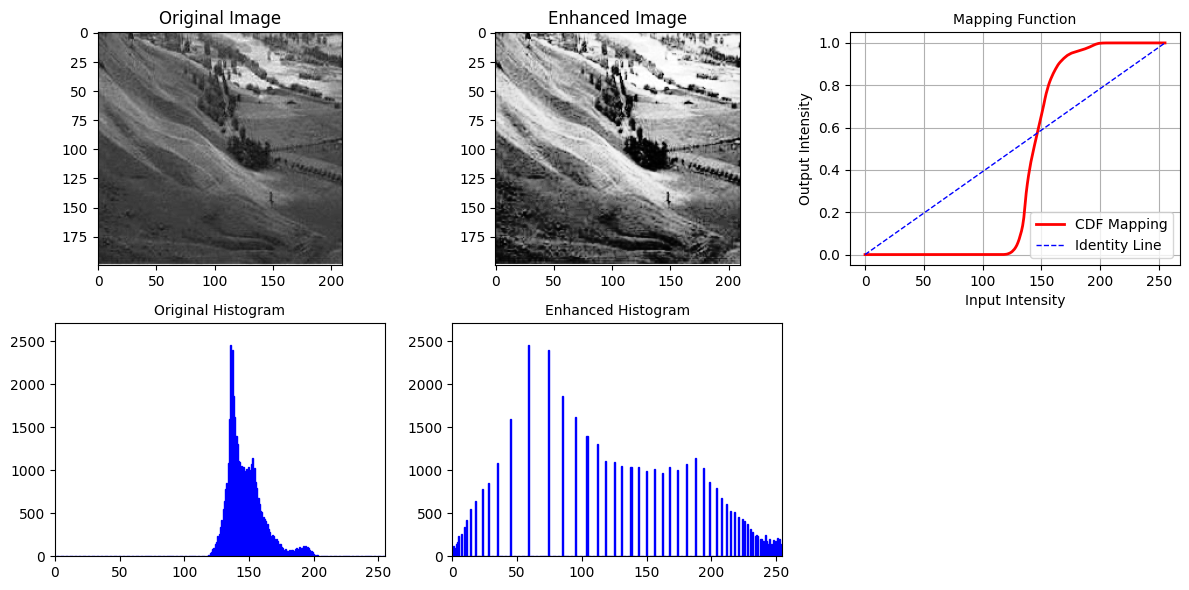

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load a Low-Contrast Image
img = cv2.imread('low_contrast_imag.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
if img is None:
    raise ValueError("Image not found or unable to load.")

# Display Original Image and Histogram
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image', fontsize=12)

# Original histogram
plt.subplot(2, 3, 4)
counts_original, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
plt.bar(bins[:-1], counts_original, color='blue', edgecolor='blue')
plt.title('Original Histogram', fontsize=10)
plt.xlim([0, 255])
plt.ylim([0, np.max(counts_original) * 1.1])

# Apply Histogram Equalization
enhanced_img = cv2.equalizeHist(img)

# Display Enhanced Image and Histogram
# Enhanced image
plt.subplot(2, 3, 2)
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanced Image', fontsize=12)

# Enhanced histogram
plt.subplot(2, 3, 5)
counts_enhanced, _ = np.histogram(enhanced_img.flatten(), bins=256, range=[0, 256])
plt.bar(bins[:-1], counts_enhanced, color='blue', edgecolor='blue')
plt.title('Enhanced Histogram', fontsize=10)
plt.xlim([0, 255])
plt.ylim([0, np.max(counts_original) * 1.1])

# Mapping Function (Straight Line)
# Compute the cumulative distribution function (CDF) for the original image
cdf = np.cumsum(counts_original) / float(np.sum(counts_original))

# Plot the mapping function
plt.subplot(2, 3, 3)
plt.plot(bins[:-1], cdf, 'r', linewidth=2)  # CDF in red
plt.plot(bins[:-1], bins[:-1] / 255, 'b--', linewidth=1)  # Identity line in blue dashed
plt.title('Mapping Function', fontsize=10)
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend(['CDF Mapping', 'Identity Line'], loc='lower right')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


## Filtering in the Frequency Domain

Gaussian Filter (low-pass freq)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import imageio.v2 as imageio
from skimage.color import rgb2gray, rgba2rgb

# Step 1: Load the image
image = imageio.imread('Jaime.png')

# Handle RGBA images by converting to RGB first
if image.shape[-1] == 4:  # Check if the image has 4 channels (RGBA)
    image = rgba2rgb(image)  # Convert RGBA to RGB

# Convert to grayscale if the image is RGB
if image.ndim == :
    image =

# Step 2: Perform the Fourier Transform
fft_image = fft2()                # Compute 2D FFT of the image
fft_shift = fftshift()        # Shift zero frequency to the center

# Step 3: Create a Gaussian Low-Pass Filter
m, n = image.shape                     # Dimensions of the image
X, Y = np.meshgrid(np.arange(-n/2, n/2), np.arange(-m/2, m/2))  # Create a grid centered at zero
D = np.sqrt(X**2 + Y**2)               # Distance from the center
D0 = 50                                # Cutoff frequency (adjust as needed)
gaussian_filter = np.exp(-(D**2) / (2 * (D0**2)))  # Gaussian filter formula

# Step 4: Apply the Gaussian filter in the frequency domain
filtered_fft =

# Step 5: Perform the Inverse Fourier Transform
ifft_shift = ifftshift()     # Shift zero frequency back
filtered_image = ifft2()       # Compute the inverse FFT
filtered_image = np.abs()  # Take the magnitude of the result

# Step 6: Display Results
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Magnitude Spectrum of Original FFT
plt.subplot(2, 2, 2)
plt.imshow(np.log(1 + np.abs(fft_shift)), cmap='gray')
plt.title('Magnitude Spectrum (Original)')

# Gaussian Filter
plt.subplot(2, 2, 3)
plt.imshow(gaussian_filter, cmap='gray')
plt.title('Gaussian Low-Pass Filter')

# Filtered Image
plt.subplot(2, 2, 4)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Low-Pass)')

plt.tight_layout()
plt.show()


Band-pass Filter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import imageio.v2 as imageio
from skimage.color import rgb2gray, rgba2rgb

# Step 1: Load the image
image = imageio.imread('Jaime.png')  # Replace with your image file

# Handle RGBA images by converting to RGB first
if image.shape[-1] == 4:  # Check if the image has 4 channels (RGBA)
    image = rgba2rgb(image)  # Convert RGBA to RGB

# Convert to grayscale if the image is RGB
if image.ndim == 3:
    image = rgb2gray(image)

# Step 2: Perform the Fourier Transform
fft_image = fft2(image)                # Compute 2D FFT of the image
fft_shift = fftshift(fft_image)        # Shift zero frequency to the center

# Step 3: Create a Band-Pass Filter
m, n = image.shape                     # Dimensions of the image
X, Y = np.meshgrid(np.arange(-n/2, n/2), np.arange(-m/2, m/2))  # Create a grid centered at zero
D = np.sqrt(X**2 + Y**2)               # Distance from the center

# Define the inner and outer cutoff frequencies for the band-pass filter
D0_low =                             # Inner cutoff frequency (high-pass threshold)
D0_high =                            # Outer cutoff frequency (low-pass threshold)

# Create the Gaussian low-pass and high-pass filters
low_pass = np.exp(-(D**2) / (2 * (D0_high**2)))     # Low-pass filter
high_pass =  # High-pass filter

# Combine to create the band-pass filter
band_pass_filter =

# Step 4: Apply the Band-Pass Filter in the Frequency Domain
filtered_fft =

# Step 5: Perform the Inverse Fourier Transform
ifft_shift = ifftshift(filtered_fft)     # Shift zero frequency back
filtered_image = ifft2(ifft_shift)       # Compute the inverse FFT
filtered_image = np.abs(filtered_image)  # Take the magnitude of the result

# Step 6: Display Results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Magnitude Spectrum of Original FFT
plt.subplot(2, 3, 2)
plt.imshow(np.log(1 + np.abs(fft_shift)), cmap='gray')
plt.title('Magnitude Spectrum (Original)')

# Band-Pass Filter
plt.subplot(2, 3, 3)
plt.imshow(band_pass_filter, cmap='gray')
plt.title('Band-Pass Filter')

# Filtered Image
plt.subplot(2, 3, 4)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Band-Pass)')

# Low-Pass Filter (for reference)
plt.subplot(2, 3, 5)
plt.imshow(low_pass, cmap='gray')
plt.title('Low-Pass Filter')

# High-Pass Filter (for reference)
plt.subplot(2, 3, 6)
plt.imshow(high_pass, cmap='gray')
plt.title('High-Pass Filter')

plt.tight_layout()
plt.show()


## Feature Extraction

Edge detection: canny

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.color import rgb2gray, rgba2rgb
from skimage.feature import canny

# Step 1: Load the image
image = imageio.imread('tree.jpeg')  # Replace with your image file

# Handle RGBA images by converting to RGB first
if image.shape[-1] == 4:  # Check if the image has 4 channels (RGBA)
    image = rgba2rgb(image)  # Convert RGBA to RGB

# Step 2: Convert to grayscale if necessary
if image.ndim == 3:  # If the image has 3 channels (RGB)
    image_gray = rgb2gray(image)  # Convert to grayscale
else:
    image_gray = image  # Image is already grayscale

# Step 3: Apply the Canny edge detection
edges = canny(image_gray, sigma=)  # Adjust sigma for edge detection sensitivity

# Step 4: Visualize the results
plt.figure(figsize=(10, 5))

# Original Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Canny Edge Detection Result
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


Segmentation: k-means

In [ ]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.color import rgb2lab, label2rgb, gray2rgb  # Add gray2rgb
from sklearn.cluster import KMeans

# Step 1: Load the image
image = imageio.imread('Jaime.png')

# Step 2: Ensure the image is in RGB format
if image.ndim == 2:  # Grayscale image (2D)
    image_rgb = gray2rgb(image)  # Convert grayscale to RGB
elif image.shape[2] == 4:  # If RGBA (4 channels), convert to RGB
    image_rgb = image[:, :, :3]
else:
    image_rgb = image  # The image is already RGB

# Convert to Lab color space
image_lab = rgb2lab(image_rgb)

# Reshape the image into a 2D array where each row is a pixel
m, n, _ = image_lab.shape
pixel_features = image_lab.reshape((m * n, 3))

# Step 3: Perform k-means clustering
num_clusters =   # Number of segments/clusters
kmeans = KMeans(n_clusters=num_clusters, n_init=3, random_state=42)
cluster_idx = kmeans.fit_predict(pixel_features)

# Reshape the clustered output back to the original image size
segmented_image = cluster_idx.reshape((m, n))

# Step 4: Display the results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Segmented image (display each region with a unique color)
segmented_rgb = label2rgb(segmented_image)
plt.subplot(1, 2, 2)
plt.imshow(segmented_rgb)
plt.title(f'Segmented Image with {num_clusters} Clusters')
plt.axis('off')

plt.show()
